



# Lending Club Case Study
---

## We will take following step wise approach
 1.  Data Sourcing & Business Understanding
 2.  Data Cleaning
     - Clean rows
     - Clean columns
     - Operate missing or partial values
     - Standerdize columns: 
         - numeric and text separately
         - keep only one of the columns that have extreamly high correlation
     - Outlier identification and treatment
 3. Derive Metrics
 4. Univariate Analysis
 5. Bivariate Analysis
 6. Conclusions:
     -  To avoid loss of business
     -  To avoid financial loss

___

# 1. Data Sourcing & Business Understanding

*  Data has been sourced from Consumer Finance Company that contains the complete loan data for all loans issued through the time period 2007 to 2011
*  The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default


#### Assumptions:
*  Data has unique member IDs, hence there are no repeat customers (even if there are there is no way to identify)
*  Long term loans i.e. '60 month' loans do not include terms extended due to defaults
*  Revolving utilization rate is not related to current loan, it relates to all credit lines available (Since the definition in data is not clear)

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import express as px
import warnings 
warnings.filterwarnings('ignore') #to avoid mixed datatype warnings
import itertools
from datetime import datetime

#### Import Data

In [2]:
loan_data = pd.read_csv("loan.csv", parse_dates=['issue_d','earliest_cr_line'])
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [3]:
loan_data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
print("Shape of the data:", loan_data.shape)

print(loan_data.member_id.nunique() == len(loan_data.member_id)) #check if member_id is unique
print(loan_data.id.nunique() == len(loan_data.id)) #check if member_id is unique

Shape of the data: (39717, 111)
True
True


##### Initial Observtions
*  39717 rows, 111 columns, 87 numeric, 24 object
*  member_id and id are unique ID columns; hence __there are no repeat customers__ (even if there are there is no way to identify)

---

# 2. Data Cleaning
___

## 2.1 Cleaning Rows
___

#### There are 3 categories in loan status -  'Fully Paid', 'Charged Off', 'Current'
'Current' loans do not provide any complete information on if the loan will be defaulted hence can be removed for the purpose of analysis


##### Remove rows with Current loan information


In [6]:
print("Dataframe Shape Before removing columns: ", loan_data.shape)

loan_data = loan_data[loan_data['loan_status']!='Current']

print("Dataframe Shape After removing the columns: ", loan_data.shape)

Dataframe Shape Before removing columns:  (39717, 111)
Dataframe Shape After removing the columns:  (38577, 111)


## 2.2 Cleaning Columns
___

#### Check for null columns

In [7]:
null_data_check = loan_data.isnull().sum()
null_data_check

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 111, dtype: int64

In [8]:
print("Number of columns in loan data: ",len(loan_data.columns))
print("Number of columns that have null values: ",len(null_data_check[loan_data.isnull().sum()!=0]))
print("Number of columns that have all null values: ", len(null_data_check[loan_data.isnull().sum()==len(loan_data)]))

Number of columns in loan data:  111
Number of columns that have null values:  68
Number of columns that have all null values:  55


In [9]:
remove_cols = null_data_check[loan_data.isnull().sum()==len(loan_data)].index
print("list of null valued columns: \n\n", remove_cols)

list of null valued columns: 

 Index(['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_2

##### Removing the all null value columns

In [10]:
print("\n Dataframe Shape Before removing columns: ", loan_data.shape)
loan_data.dropna(axis=1, how='all',inplace=True)
print("\n Dataframe Shape After removing the columns: ", loan_data.shape)


 Dataframe Shape Before removing columns:  (38577, 111)

 Dataframe Shape After removing the columns:  (38577, 56)


#### Check for single values columns:
As these columns do not provide any help while we want to seggregate default loans and good loans

In [11]:
single_valued_cols = []
[single_valued_cols.append(col) for col in loan_data.columns if loan_data[col].nunique()==1]
print("\nThere are", len(single_valued_cols),"such columns where values are unique and hence can be removed for further analysis:\n")
print(single_valued_cols)


There are 11 such columns where values are unique and hence can be removed for further analysis:

['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


##### Removing such single valued columns

In [12]:
print("Dataframe Shape Before removing columns:", loan_data.shape)
loan_data.drop(single_valued_cols, axis =1, inplace=True)
print("\nDataframe Shape After removing the columns: ", loan_data.shape)

Dataframe Shape Before removing columns: (38577, 56)

Dataframe Shape After removing the columns:  (38577, 45)


#### Check for No Impact columns
* There are certain columns that do not have any use in deciding if the user will default. All such columns are picked below manually through data understanding and will be removed
    * 'ID' -> this column is unique for each user and hence does not help separate defaulters at all
    * 'emp_title' -> can not be used as it is as it has hundreds of unique values those can not be categorized.
        * It could be helpful if we get another table with emp to industry mapping. Can feture engineer the new columns.
    * url -> seems to be extention of member_id
    * 'desc', purpose' and 'title' serve the same purpose, however, 'purpose' has better categorization hence we can get rid of 'title' and 'desc'.
        * 'desc' could be used to do some text analytics and categorize further, but this is out of scope for now

    * We can keep State information only, since zip info will be too much to classify upon

##### Removing identified columns

In [13]:
identifier_columns = ['id','member_id','emp_title','url','zip_code','title','desc']

print("Dataframe Shape Before removing columns: ", loan_data.shape)
loan_data.drop(identifier_columns, axis =1, inplace=True)
print("\nDataframe Shape After removing the columns: ", loan_data.shape)

Dataframe Shape Before removing columns:  (38577, 45)

Dataframe Shape After removing the columns:  (38577, 38)


#### With the help of business rules more columns can be removed
* Non accesible columns
    * Since __member_id__ is unique there are no repeat customers in dataset
    * Hence any column that has data after the loan was approved and in use will be of no use to decide if the loan has to be given
    * Also, __these columns won't be available when a new customer has to be identified for defaulter or payer__.

In [14]:
non_access_cols = ['collection_recovery_fee','delinq_2yrs','last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','mths_since_last_delinq','mths_since_last_record','recoveries','revol_bal','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','earliest_cr_line']

##### Removing non accesible columns

In [15]:
print("Dataframe Shape Before removing the columns: ", loan_data.shape)
loan_data.drop(non_access_cols, axis = 1, inplace = True)
print("\nDataframe Shape After removing the columns: ", loan_data.shape)

Dataframe Shape Before removing the columns:  (38577, 38)

Dataframe Shape After removing the columns:  (38577, 23)


Now that we have removed most of the unncessary columns we can move to next part of the analysis
___

## 2.3 Operate missing or partial values
___

#### Check for partial null columns 

emp_length              1033
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

 over length of full data:  38577


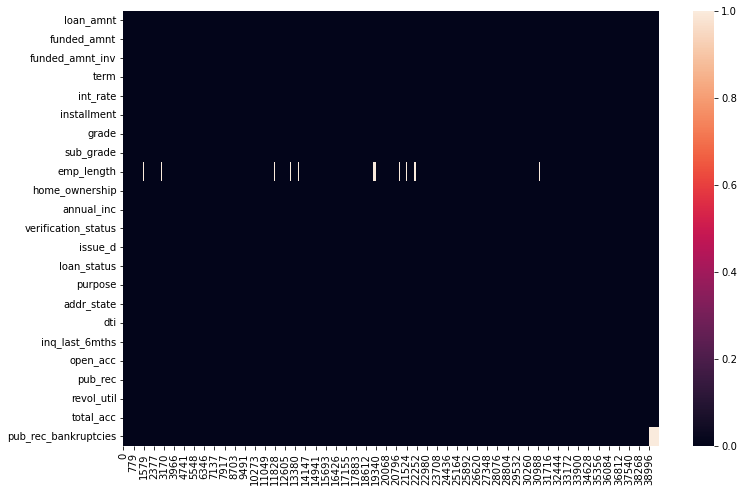

In [16]:
x= loan_data.isnull().sum()
print(x[loan_data.isnull().sum()!=0])
print("\n over length of full data: ",len(loan_data))

plt.figure(figsize=(12,8))
sns.heatmap(loan_data.isna().transpose())
plt.show()

#### There are 3 columns that need attention as they have multiple null values and 1 column that has No data value
*  __revol_until__: has few records and such records can be removed directly
*  Other 2 columns have significant records and need a replacement for null values
*  __home_ownership__ column has categories, other and No data

In [17]:
print("emp_len value counts: \n\n",loan_data.emp_length.value_counts(),"\n")

emp_len value counts: 

 10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64 



In [18]:
print("bankruptcy value counts: \n\n",loan_data.pub_rec_bankruptcies.value_counts())

bankruptcy value counts: 

 0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


In [19]:
print("home ownership value counts: \n\n",loan_data.home_ownership.value_counts())

home ownership value counts: 

 RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


#### Observations:
* Since __emp_len__ is a categorical variable, and 1st and 2nd highest value count has huge difference, __mode is safest value replace nulls__
* Since __bankruptcy__ is numeric variable, and 1st and 2nd highest value has huge difference, __median is safest value to replace nulls__
* 50 records of revol_util can be removed
* 101 records with no useful values from __home_ownership__ can similarly be __replaced with mode value__ 

##### Operating missing values

In [20]:
print("Dataframe Shape Before removing the rows: ", loan_data.shape)

loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.pub_rec_bankruptcies.fillna(loan_data.pub_rec_bankruptcies.median(), inplace=True)
loan_data = loan_data[~loan_data.revol_util.isnull()]
loan_data['home_ownership'] = np.where((loan_data.home_ownership.isin(['OTHER','NONE'])),loan_data.home_ownership.mode(),loan_data.home_ownership)

print("\nDataframe Shape After removing the rows: ", loan_data.shape)


Dataframe Shape Before removing the rows:  (38577, 23)

Dataframe Shape After removing the rows:  (38527, 23)


Now that null values are addressed we can move on to the next step of standerdizing the values
___

## 2.4 Standardize Columns
___

In [21]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38527 non-null  int64  
 1   funded_amnt           38527 non-null  int64  
 2   funded_amnt_inv       38527 non-null  float64
 3   term                  38527 non-null  object 
 4   int_rate              38527 non-null  object 
 5   installment           38527 non-null  float64
 6   grade                 38527 non-null  object 
 7   sub_grade             38527 non-null  object 
 8   emp_length            38527 non-null  object 
 9   home_ownership        38527 non-null  object 
 10  annual_inc            38527 non-null  float64
 11  verification_status   38527 non-null  object 
 12  issue_d               38527 non-null  object 
 13  loan_status           38527 non-null  object 
 14  purpose               38527 non-null  object 
 15  addr_state         

#### Observations:
* Change term from months to years 3 and 5 and make it numeric - int _(Optional)_
* pub_rec_bankruptcies should be changed to int
* change type of int_rate, revol_util to float values

##### Changing types

In [22]:
percent_cols = ['int_rate', 'revol_util']
#loan_data.term = np.where(loan_data.term.apply(lambda x:x.strip()) =='60 months',5,3).astype('int64')
loan_data.pub_rec_bankruptcies = loan_data.pub_rec_bankruptcies.astype('int64')
for i in percent_cols:
    loan_data[i] = loan_data[i].str.strip('%').astype('float64')

In [23]:
#loan_data.info()
loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
5       5000         5000           5000.0   36 months      7.90       156.46   

  grade sub_grade emp_length home_ownership  ...  loan_status         purpose  \
0     B        B2  10+ years           RENT  ...   Fully Paid     credit_card   
1     C        C4   < 1 year           RENT  ...  Charged Off             car   
2     C        C5  10+ years           RENT  ...   Fully Paid  small_business   
3     C        C1  10+ years           RENT  ...   Fully Paid           other   
5     A        A4    3 years           RENT  ...   Fully Paid         wedding   

  addr_state    dti inq_last_6mths open_acc  pub_rec  revol_util  total_acc  \
0         AZ  27.65              1        3        0        83.7          9   
1         GA   1.00              5        3        0         9.4          4   
2         IL   8.72              2        2        0        98.5         10   
3         CA  20.00              1       10        0        21.0         37   
5         AZ  11.20              3        9        0        28.3         12   

   pub_rec_bankruptcies  
0                     0  
1                     0  
2                     0  
3                     0  
5                     0  

[5 rows x 23 columns]

#### Since we removed unique identifier from the table, before we move further it is essential that we remove all duplicate rows

In [24]:
print("Dataframe Shape After removing the rows: ", loan_data.shape)
loan_data.drop_duplicates(keep='first', inplace=True)
print("\nDataframe Shape After removing the rows: ", loan_data.shape)

Dataframe Shape After removing the rows:  (38527, 23)

Dataframe Shape After removing the rows:  (38527, 23)


##### Separating Numeric and Object columns

In [25]:
loan_obj = loan_data.select_dtypes(include= 'object')
loan_num = loan_data.select_dtypes(exclude= 'object')

print("We have", loan_num.shape[1], "numeric and ", loan_obj.shape[1],"non-numeric columns")

We have 13 numeric and  10 non-numeric columns


In [26]:
loan_num.describe()

loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  38527.000000  38527.000000     38527.000000  38527.000000   
mean   11055.265139  10791.956939     10230.940095     11.927378   
std     7348.433587   7090.256225      7022.678989      3.690161   
min      500.000000    500.000000         0.000000      5.420000   
25%     5325.000000   5200.000000      5000.000000      8.940000   
50%     9600.000000   9600.000000      8750.000000     11.710000   
75%    15000.000000  15000.000000     14000.000000     14.350000   
max    35000.000000  35000.000000     35000.000000     24.400000   

        installment    annual_inc           dti  inq_last_6mths      open_acc  \
count  38527.000000  3.852700e+04  38527.000000    38527.000000  38527.000000   
mean     322.678650  6.880923e+04     13.276353        0.871752      9.281413   
std      208.649278  6.421493e+04      6.671392        1.071756      4.400158   
min       15.690000  4.000000e+03      0.000000        0.000000      2.000000   
25%      165.740000  4.000000e+04      8.140000        0.000000      6.000000   
50%      278.150000  5.900000e+04     13.370000        1.000000      9.000000   
75%      425.860000  8.200000e+04     18.560000        1.000000     12.000000   
max     1305.190000  6.000000e+06     29.990000        8.000000     44.000000   

            pub_rec    revol_util     total_acc  pub_rec_bankruptcies  
count  38527.000000  38527.000000  38527.000000          38527.000000  
mean       0.055442     48.702777     22.067615              0.042723  
std        0.237853     28.364741     11.422526              0.202876  
min        0.000000      0.000000      2.000000              0.000000  
25%        0.000000     25.200000     13.000000              0.000000  
50%        0.000000     49.100000     20.000000              0.000000  
75%        0.000000     72.300000     29.000000              0.000000  
max        4.000000     99.900000     90.000000              2.000000

#### Check if there are extreamly highly correlated columns

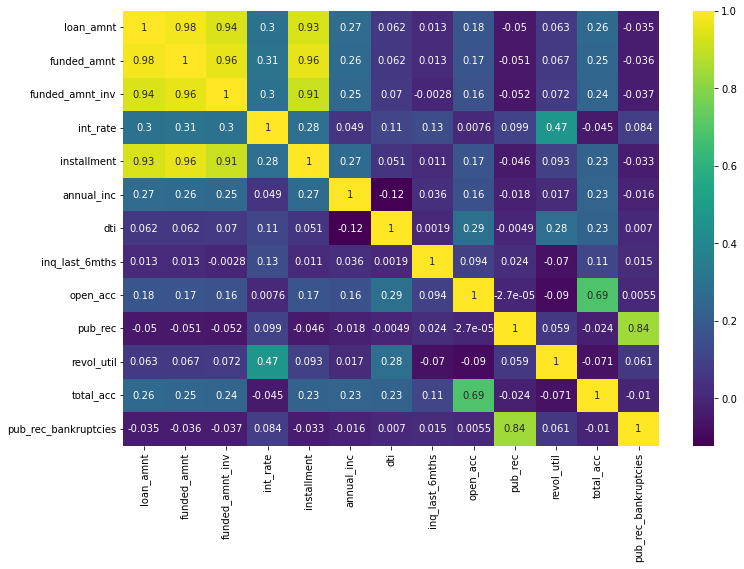

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(loan_num.corr(), annot=True, cmap ='viridis')
plt.show()

#### __Observations__:
* loan_amnt, funded_amnt, funded_amnt_inv, installment are extreamly highly correlated
    * Only one of them should be used so that we do not skew the multivariate analysis results as well as final predections 
* Also, pub_rec and pub_rec_bankruptcies have some correlation that we need to check in details for

##### Analyzing 2 Pub columns for correlation

In [28]:
pd.pivot_table(data=loan_data,index = 'pub_rec', columns=['pub_rec_bankruptcies','loan_status'],values='purpose', aggfunc='count')

pub_rec_bankruptcies           0                      1             \
loan_status          Charged Off Fully Paid Charged Off Fully Paid   
pub_rec                                                              
0                         5144.0    31315.0         NaN        NaN   
1                           91.0      284.0       366.0     1270.0   
2                            8.0       35.0         NaN        NaN   
3                            NaN        7.0         NaN        NaN   
4                            NaN        2.0         NaN        NaN   

pub_rec_bankruptcies           2             
loan_status          Charged Off Fully Paid  
pub_rec                                      
0                            NaN        NaN  
1                            NaN        NaN  
2                            2.0        3.0  
3                            NaN        NaN  
4                            NaN        NaN

##### Onservation: Pub Rec does not cover any additional information in categories 3 and 4. Hence, Public Bankruptcy records should be a better metric to move forward; Hence we drop pub_rec.


##### Removing correlated columns, keeping only one of those

In [29]:
loan_data.drop(columns=['funded_amnt', 'funded_amnt_inv', 'installment', 'pub_rec'], inplace=True)
loan_num.drop(columns=['funded_amnt', 'funded_amnt_inv', 'installment', 'pub_rec'], inplace=True)

Now that we have standerdized the columns we can proceed to treat outlier 
___

## 2.5 Outlier identification and treatment
___

In [30]:
loan_num.describe()

loan_amnt      int_rate    annual_inc           dti  inq_last_6mths  \
count  38527.000000  38527.000000  3.852700e+04  38527.000000    38527.000000   
mean   11055.265139     11.927378  6.880923e+04     13.276353        0.871752   
std     7348.433587      3.690161  6.421493e+04      6.671392        1.071756   
min      500.000000      5.420000  4.000000e+03      0.000000        0.000000   
25%     5325.000000      8.940000  4.000000e+04      8.140000        0.000000   
50%     9600.000000     11.710000  5.900000e+04     13.370000        1.000000   
75%    15000.000000     14.350000  8.200000e+04     18.560000        1.000000   
max    35000.000000     24.400000  6.000000e+06     29.990000        8.000000   

           open_acc    revol_util     total_acc  pub_rec_bankruptcies  
count  38527.000000  38527.000000  38527.000000          38527.000000  
mean       9.281413     48.702777     22.067615              0.042723  
std        4.400158     28.364741     11.422526              0.202876  
min        2.000000      0.000000      2.000000              0.000000  
25%        6.000000     25.200000     13.000000              0.000000  
50%        9.000000     49.100000     20.000000              0.000000  
75%       12.000000     72.300000     29.000000              0.000000  
max       44.000000     99.900000     90.000000              2.000000

##### An outlier can be identified if there's huge jump from in lower or higher quartile compared to other quartiles
* It appears loan_amt, annual_inc,dti, inq_last_6_months have outliers

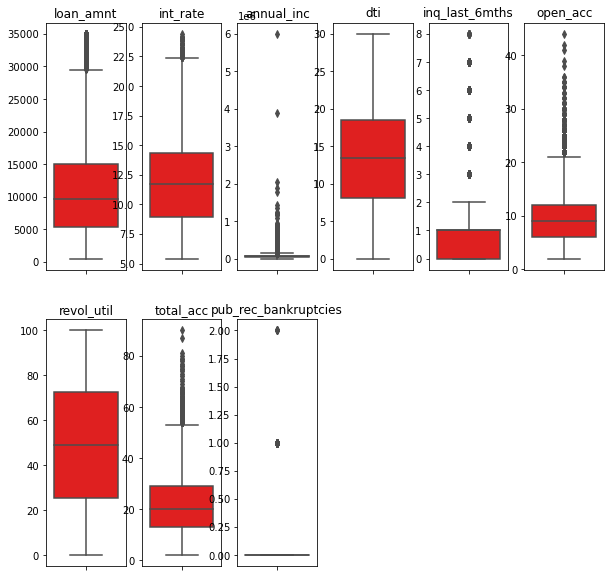

In [31]:
outlier_col = loan_num.columns.values

plt.figure(figsize=[10,10])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(2,6,j+1)
    ax = sns.boxplot(y = loan_num[i], color='red')
    ax.set(ylabel=None)
    plt.title(i)

#### Observations: 
* Annual Income has some extream values that need to be removed. All other columns have acceptable outliers.

#### Analyze and remove annual income outliers

In [32]:
annul_inc_quantile = loan_data.annual_inc.quantile([0.5, 0.7, 0.8, 0.9, 0.95, 0.975,0.99,1])
annul_inc_quantile

0.500      59000.0
0.700      75000.0
0.800      90000.0
0.900     115000.0
0.950     140004.0
0.975     175000.0
0.990     234000.0
1.000    6000000.0
Name: annual_inc, dtype: float64

##### Removing oulier data after 97.5th percentile 

In [33]:
x=loan_data.shape
print("\nDataframe Shape Before removing the rows: ", loan_data.shape)
loan_data = loan_data[loan_data.annual_inc <= loan_data['annual_inc'].quantile(0.975)]
print("\nDataframe Shape After removing the rows: ", loan_data.shape)
print("\n", x[0]-loan_data.shape[0],"rows deleted")


Dataframe Shape Before removing the rows:  (38527, 19)

Dataframe Shape After removing the rows:  (37581, 19)

 946 rows deleted


Now that we have treated outliers, let's move on to derive few metrics from numerical features
___

# 3. Categorization / Derived Metrics
___

In [34]:
loan_data.head()

loan_amnt        term  int_rate grade sub_grade emp_length home_ownership  \
0       5000   36 months     10.65     B        B2  10+ years           RENT   
1       2500   60 months     15.27     C        C4   < 1 year           RENT   
2       2400   36 months     15.96     C        C5  10+ years           RENT   
3      10000   36 months     13.49     C        C1  10+ years           RENT   
5       5000   36 months      7.90     A        A4    3 years           RENT   

   annual_inc verification_status issue_d  loan_status         purpose  \
0     24000.0            Verified  Dec-11   Fully Paid     credit_card   
1     30000.0     Source Verified  Dec-11  Charged Off             car   
2     12252.0        Not Verified  Dec-11   Fully Paid  small_business   
3     49200.0     Source Verified  Dec-11   Fully Paid           other   
5     36000.0     Source Verified  Dec-11   Fully Paid         wedding   

  addr_state    dti  inq_last_6mths  open_acc  revol_util  total_acc  \
0         AZ  27.65               1         3        83.7          9   
1         GA   1.00               5         3         9.4          4   
2         IL   8.72               2         2        98.5         10   
3         CA  20.00               1        10        21.0         37   
5         AZ  11.20               3         9        28.3         12   

   pub_rec_bankruptcies  
0                     0  
1                     0  
2                     0  
3                     0  
5                     0

In [35]:
loan_data.verification_status.sort_values().unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

##### After going through unique values of all the remaining columns have arrived to a conclusion that we should create groups for following columns as they have many values and will be useless if not grouped
* loan_amnt
* int_rate
* emp_length
* annual_inc
* dti

##### grouping loan amount

In [36]:
# loan_amnt: varies 500 to 35000
bins = range(0,40000,5000)
labels = ['0-5K','5-10K','10-15K','15-20K','20-25K','25-30K','30-40K']
loan_data['loan_amt_seg'] = pd.cut(loan_data['loan_amnt'], bins=bins, labels=labels)

In [81]:
loan_data.loan_amt_seg.value_counts()

5-10K     12630
0-5K       9360
10-15K     7512
15-20K     4196
20-25K     2627
25-30K      636
30-40K      620
Name: loan_amt_seg, dtype: int64

##### grouping int rate

In [38]:
# int_rate: varies 5.42 to 24.4
bins = range(5,30,5)
labels = ['5-10','10-15','15-20','20-25']
loan_data['int_rate_seg'] = pd.cut(loan_data['int_rate'], bins=bins, labels=labels)

In [39]:
loan_data.int_rate_seg.value_counts()

10-15    17807
5-10     12085
15-20     6978
20-25      711
Name: int_rate_seg, dtype: int64

##### grouping employment length better

In [40]:
# emp_length varies 1 to 10
loan_data.emp_length = loan_data.emp_length.apply(lambda x: x.strip(' years').strip('+').strip('< ')).astype('int64')
loan_data.emp_length.value_counts()

10    9196
1     7521
2     4178
3     3929
4     3262
5     3118
6     2120
7     1672
8     1386
9     1199
Name: emp_length, dtype: int64

##### grouping annual income

In [41]:
#loan_data.annual_inc
#varies 4000 to 175000
bins= range(0,200000,25000)
labels = ['0-25K','25-50K','50-75K','75-100K','100-125K','125-150K','150-175K']
loan_data['annual_inc_seg'] = pd.cut(loan_data['annual_inc'],bins=bins,labels=labels)

In [42]:
loan_data.annual_inc_seg.value_counts()

25-50K      12816
50-75K      11665
75-100K      6037
100-125K     2694
0-25K        2531
125-150K     1299
150-175K      539
Name: annual_inc_seg, dtype: int64

##### grouping dti

In [43]:
#loan_data.dti
#varies 0.0 to 30.0
bins= np.arange(0.0,35.0,5.0)
labels = ['0-5','5-10','10-15','15-20','20-25','25-30']
loan_data['dti_seg'] = pd.cut(loan_data['dti'],bins=bins,labels=labels)

In [44]:
loan_data['dti_seg'].value_counts()

10-15    9402
15-20    8693
5-10     7550
20-25    6531
0-5      4618
25-30     621
Name: dti_seg, dtype: int64

##### creating new feature and grouping open by total credit lines
##### open_acc/total_acc would be a better feature to move ahead with instead of two columns separately

In [45]:
loan_data['OpenBYtotal'] = loan_data['open_acc']/loan_data['total_acc']
loan_num['OpenBYtotal'] = loan_num['open_acc']/loan_num['total_acc']

loan_data.drop(columns=['open_acc','total_acc'],inplace=True)
loan_num.drop(columns=['open_acc','total_acc'],inplace=True)

# There is only one record with anamoly with 1.75 open/closed credit lines. We replace this by 1.0 which is maximum possible value

loan_data['OpenBYtotal'] = np.where(loan_data['OpenBYtotal'] > 1.00 ,1.00 ,loan_data['OpenBYtotal'])

In [46]:
# varies 0.05 to 1.75 712 values
bins= np.arange(0.0,1.25,0.25)
labels = ['0-0.25','0.25-0.50','0.50-0.75','0.75-1.0']
loan_data['Open_CL_BY_Total'] = pd.cut(loan_data['OpenBYtotal'],bins=bins,labels=labels)

In [47]:
loan_data['Open_CL_BY_Total'].value_counts()

0.25-0.50    20250
0.50-0.75    10425
0-0.25        3819
0.75-1.0      3087
Name: Open_CL_BY_Total, dtype: int64

##### grouping revol_util

In [48]:
# varies 0 to 100 as it is % value converted to float
bins= range(0,120,20)
labels = ['0-20','20-40','40-60','60-80','80-100']
loan_data['revol_util_seg'] = pd.cut(loan_data['revol_util'], bins=bins, labels=labels)

In [49]:
loan_data['revol_util_seg'].value_counts()

40-60     8241
60-80     7816
20-40     7540
0-20      6630
80-100    6443
Name: revol_util_seg, dtype: int64

#### Standardize date column

In [50]:
loan_data['issue_month'] = loan_data.issue_d.apply(lambda x: x[:3])
loan_data['issue_year'] = loan_data.issue_d.apply(lambda x: '20'+ x[4:])
#loan_data['issue_month_year'] = pd.to_datetime(loan_data[['issue_year','issue_month','1']])

Now that we have all the required columns, we can move to next step

___

# 4. Univariate / Segmented Univariate Analysis
___

In [51]:
loan_data.drop(columns = ['loan_amnt','int_rate','annual_inc','OpenBYtotal']).head()

term grade sub_grade  emp_length home_ownership verification_status  \
0   36 months     B        B2          10           RENT            Verified   
1   60 months     C        C4           1           RENT     Source Verified   
2   36 months     C        C5          10           RENT        Not Verified   
3   36 months     C        C1          10           RENT     Source Verified   
5   36 months     A        A4           3           RENT     Source Verified   

  issue_d  loan_status         purpose addr_state  ...  revol_util  \
0  Dec-11   Fully Paid     credit_card         AZ  ...        83.7   
1  Dec-11  Charged Off             car         GA  ...         9.4   
2  Dec-11   Fully Paid  small_business         IL  ...        98.5   
3  Dec-11   Fully Paid           other         CA  ...        21.0   
5  Dec-11   Fully Paid         wedding         AZ  ...        28.3   

   pub_rec_bankruptcies  loan_amt_seg  int_rate_seg annual_inc_seg dti_seg  \
0                     0          0-5K         10-15          0-25K   25-30   
1                     0          0-5K         15-20         25-50K     0-5   
2                     0          0-5K         15-20          0-25K    5-10   
3                     0         5-10K         10-15         25-50K   15-20   
5                     0          0-5K          5-10         25-50K   10-15   

  Open_CL_BY_Total revol_util_seg issue_month issue_year  
0        0.25-0.50         80-100         Dec       2011  
1        0.50-0.75           0-20         Dec       2011  
2           0-0.25         80-100         Dec       2011  
3        0.25-0.50          20-40         Dec       2011  
5        0.50-0.75          20-40         Dec       2011  

[5 rows x 22 columns]

___

#### Quick note: 
__Target variable is Loan Status__ and hence we plan to do univariate analysis for categories around the same

#### Loan status comparison

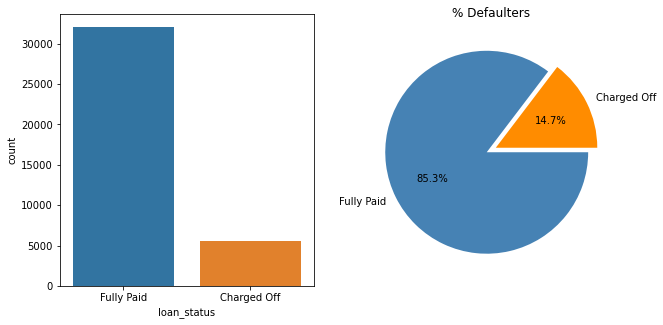

In [84]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'loan_status', data = loan_data)
plt.subplot(1,2,2)
loan_data.groupby(['loan_status']).size().plot(kind='pie', y='counted',title ='% Defaulters', ylabel='',colors=['darkorange','steelblue'], autopct='%1.1f%%', explode=(0.05, 0.05), startangle =0)
plt.show()

### Insights:
1. About __15% of the loans are defaulted__
2. This value could be taken as reference while we do further analysis to decide bad default rate

#### Comparing impact of each categorical feature on target variable i.e. loan status  

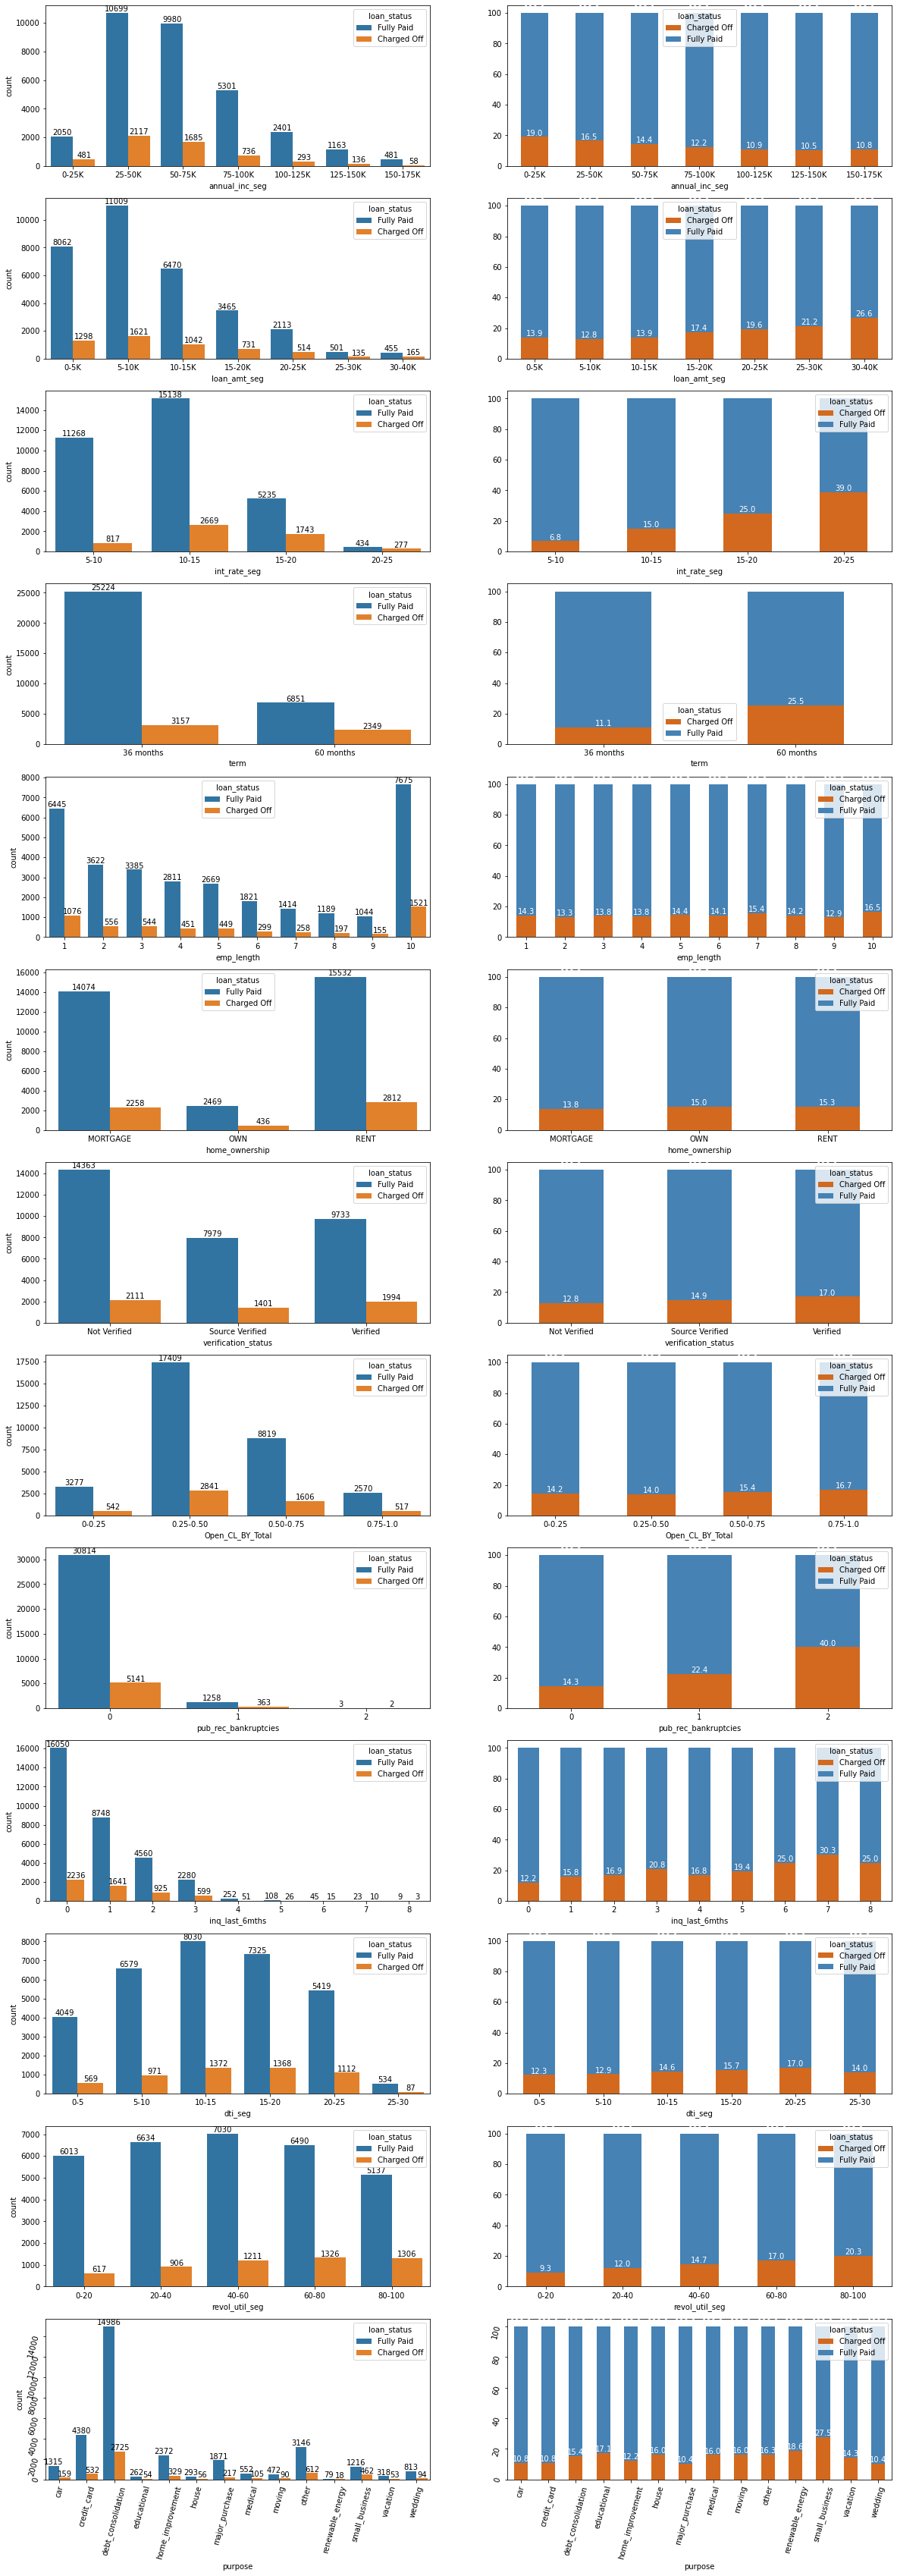

In [73]:
uni_variables = ['annual_inc_seg', 'loan_amt_seg', 'int_rate_seg' ,'term','emp_length', 'home_ownership',
                 'verification_status','Open_CL_BY_Total','pub_rec_bankruptcies','inq_last_6mths','dti_seg','revol_util_seg','purpose']
axes = ['ax1','ax2','ax3','ax4','ax5','ax6','ax7','ax8','ax9','ax10','ax11','ax12',
        'ax13','ax14','ax15','ax16','ax17','ax18','ax19','ax20','ax21','ax22','ax23','ax24','ax25','ax26']


fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8),(ax9, ax10),
      (ax11, ax12),(ax13, ax14),(ax15, ax16),(ax17,ax18), 
      (ax19,ax20), (ax21,ax22), (ax23,ax24), (ax25,ax26)) = plt.subplots(nrows = int(len(axes)/2), ncols = 2)



for i,j in itertools.zip_longest(uni_variables, range(0,int(len(axes)),2)):    
    
    
    sns.countplot(ax= eval(axes[j]), x = loan_data[i].sort_values(), hue = loan_data['loan_status'])
    
    if loan_data[i].nunique()>10:
        eval(axes[j]).tick_params(labelrotation=75)
    else:
        eval(axes[j]).tick_params(labelrotation=0)      
    for container in eval(axes[j]).containers:
        eval(axes[j]).bar_label(container, fmt='%g', color = 'black')
        
    #eval(axes[j]).title(i, y=0.9, fontsize =14)
    
    
     
    (loan_data.groupby(i)['loan_status'].value_counts(normalize=True).unstack('loan_status')*100).plot(ax=eval(axes[j+1]), 
                                            kind = 'bar', stacked=True, figsize = (20,60), color=['chocolate','steelblue'])
    if loan_data[i].nunique()>10:
        eval(axes[j+1]).tick_params(labelrotation=75)
    else:
        eval(axes[j+1]).tick_params(labelrotation=0)
    for container in eval(axes[j+1]).containers:
        eval(axes[j+1]).bar_label(container, fmt='%0.1f', color = 'white')


#      Left: Count of Feature over segments                              Right: % Share of feature

---

## Insights:
1. __Lower income groups__ default more often than higher income group. Specifically, __lower than 50K income group defaults more__ than 15% of the times


2. __Higher loan amount__ results in more default rates. Specifically, loan value of __15K and above leads to defaults__ of over 15% and 25K and obove defaults to over 20%


3. __Higher intrest rates__ result in huge defaulters. Specifically, intrest rates of __10 % and obove__ default to more than 15%


4. __Loans given out for longer period__ are more __likly to default__. Specifically, 25% of the __5 years loans__ are default


5. _Home ownership, employement length, verification status and 'open credit lines over total credit lines'_   __do not individually affect__ the loan status


6. __Almost 1 out of 4__ profiles who have __pulic bankruptcy, default__ the loan


7. __DTI between 15 to 25__ has seen __more than average defaulters__. 


8. __Small business__ although small in number is the __most defaulted loan type (purpose)__


9. Intuitively, profiles __already using most of their revolving credit are likely to default__ 


10. __People who default more have inquired more__. Specifically, Profiles who inquire more than once are likely to default more than average.


* One can infer, the best case to offer loan would be - a profile that has -> __High income - Low loan amount - Low interest rate - Short Term - With no bankruptcy record__

___


#### Sample below shows BEST case scenario for granting the loan


In [54]:
loan_data.loc[(loan_data['annual_inc']>=50000) & (loan_data['loan_amnt']<=15000) 
              & (loan_data['int_rate']<=10) & (loan_data['term']==' 36 months') & (loan_data.pub_rec_bankruptcies == 0), 
              ['loan_status']].value_counts(normalize=True)*100

loan_status
Fully Paid     95.130641
Charged Off     4.869359
dtype: float64

#### Sample below shows WORST case scenario for granting the loan

In [55]:
loan_data.loc[(loan_data['annual_inc']<=50000) & (loan_data['loan_amnt']>=15000) 
              & (loan_data['int_rate']>=10) & (loan_data['term']==' 60 months') & (loan_data.pub_rec_bankruptcies == 0), 
              ['loan_status']].value_counts(normalize=True)*100

loan_status
Fully Paid     66.752246
Charged Off    33.247754
dtype: float64

___

#### Share of Verification Status 

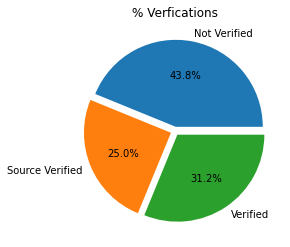

In [56]:
loan_data.groupby(['verification_status']).size().plot(kind='pie', y='counted',title ='% Verfications', ylabel='', autopct='%1.1f%%', explode=(0.05, 0.05, 0.05), startangle =0)
plt.show()

### Observations:
1.  ~44% of the prospects are not verified
2. From segmented univariate analysis charts, we also observed that - __verified and source verified__ prospects __default more than average default %__ (i.e. 15%) 

___





### Which STATE has most Defaulters (Number and  % Defaulters)?

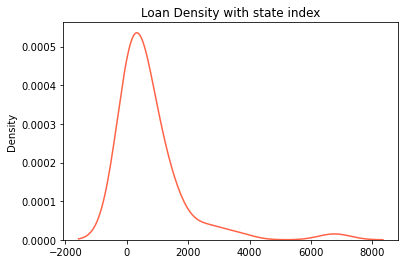

In [76]:
loan_data_states = pd.pivot_table(data=loan_data, index = 'addr_state',columns ='loan_status',values = 'purpose',aggfunc = np.size).fillna(0)

sns.kdeplot(loan_data_states.sum(axis =1), color = 'tomato')
plt.title('Loan Density with state index')
plt.show()

#### Obseravtions:
1. Considering only states where __number of loans is >=10__; Because lower loan values will show higher % defaulters which is not really the case 
2. Only __5 states__ have such __low # of loan takers__, and these values are __replaced with median__ of the data; as data is already skewed towards right

In [58]:
loan_data_states['Defaulter %'] = round((loan_data_states['Charged Off']/loan_data_states.sum(axis =1))*100,2)
print("Median of the data set is:", loan_data_states['Defaulter %'].median())
print("Min value of Defaulter value is:", loan_data_states['Defaulter %'].min())
loan_data_states.head()

Median of the data set is: 13.434999999999999
Min value of Defaulter value is: 0.0


loan_status  Charged Off  Fully Paid  Defaulter %
addr_state                                       
AK                  13.0        62.0        17.33
AL                  53.0       376.0        12.35
AR                  26.0       202.0        11.40
AZ                 119.0       706.0        14.42
CA                1103.0      5665.0        16.30

In [59]:
loan_data_states['Defaulter %'] = np.where((loan_data_states[['Charged Off','Fully Paid']].sum(axis =1)) >=10 ,loan_data_states['Defaulter %'] ,loan_data_states['Defaulter %'].median())
print("Median of the new data set is: ",round(loan_data_states['Defaulter %'].median(),2))
print("Minimum defaulter% value:\n", loan_data_states['Defaulter %'].min())

loan_data_state = loan_data_states.reset_index()

Median of the new data set is:  13.43
Minimum defaulter% value:
 5.0


In [60]:
fig = px.choropleth(loan_data_state,  # Input Pandas DataFrame
                    locations="addr_state",  # DataFrame column with locations
                    color="Defaulter %",  # DataFrame column with color values
                    hover_name="Charged Off", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States

fig.update_layout(
    title_text = 'State-wise % defaulter', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

### Observations:
1. Profiles from __western states are slightly more likely to default__ compared to eastern and central states

___

### What Month and Year has seen most defaulters?

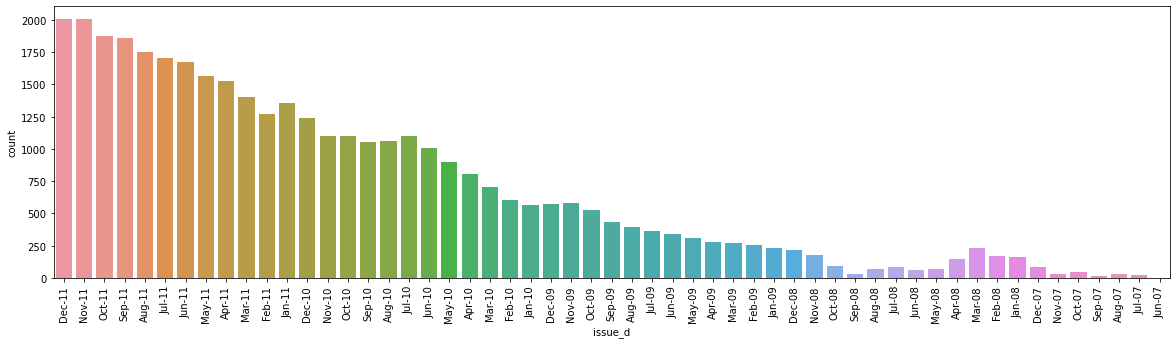

In [61]:
plt.figure(figsize=(20,5))
ax = sns.countplot(data=loan_data, x='issue_d')
plt.xticks(rotation=90)
#ax.set_yscale("log")
plt.show()

In [62]:
loan_data_months = pd.pivot_table(data=loan_data, index = 'issue_month',columns ='loan_status',values = 'purpose',aggfunc = np.size).fillna(0)
loan_data_months.index = pd.Categorical(loan_data_months.index, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',])
loan_data_months.sort_index(inplace =True)

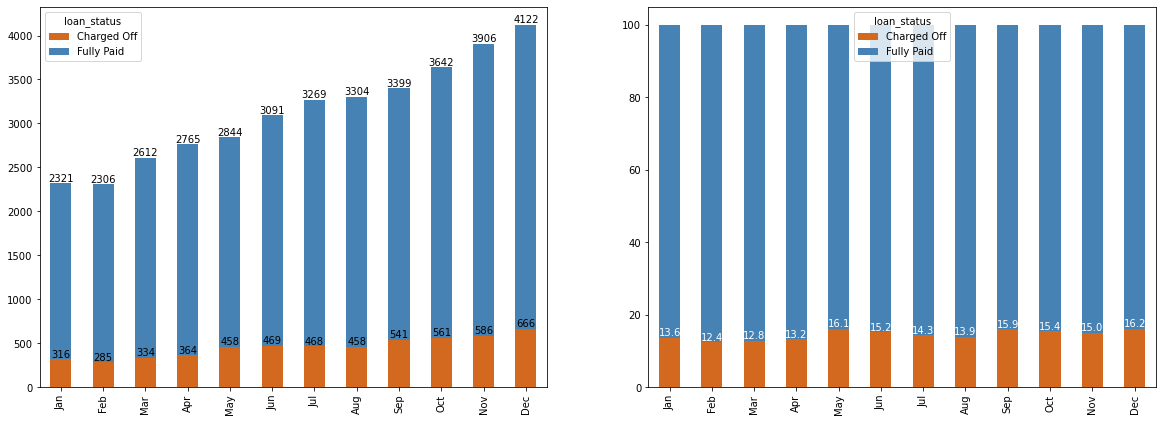

In [63]:
#sns.color_palette('rainbow')
fig, (ax1,ax2) = plt.subplots(nrows =1, ncols =2, figsize = (20,7))

loan_data_months.plot(ax=ax1, kind = 'bar', stacked=True, color=['chocolate','steelblue'])
for container in ax1.containers:
    ax1.bar_label(container, fmt='%g')#, color = 'white')

loan_data_months.apply(lambda x: x*100/sum(x), axis=1).plot(ax=ax2, kind = 'bar', stacked=True, 
                                                            color=['chocolate','steelblue'])
for container in ax2.containers:
    ax2.bar_label(container, fmt='%0.1f', color = 'white')

### Observations:
1. Both the number of loans given out and number of loans defaulted have increased every year
2. Both number of loans and number of defaulters increase as we move towards end of the year. Specifically, the last quarter of year i.e. the first quarter of new financial year sees high defaulters

Hence, __Follow strict guidlines__ while lending the loans __during the first financial quarter__ of the year.

___

# 5. Multivariate Analysis
___

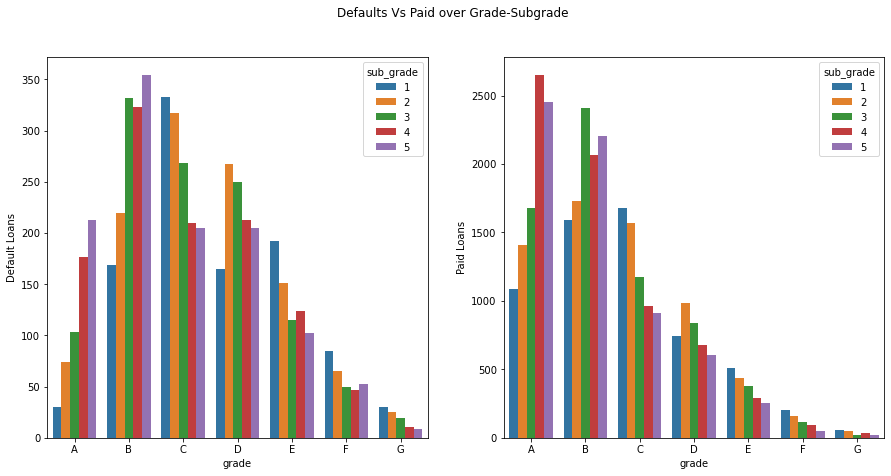

In [64]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(data = loan_data[loan_data.loan_status == 'Charged Off'], x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = loan_data['sub_grade'].apply(lambda x: int(x[-1])))
plt.ylabel('Default Loans')

plt.subplot(1,2,2)
sns.countplot(data = loan_data[loan_data.loan_status == 'Fully Paid'], x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = loan_data['sub_grade'].apply(lambda x: int(x[-1])))
plt.ylabel('Paid Loans')

plt.suptitle("Defaults Vs Paid over Grade-Subgrade")
plt.show()

### Observations:
1. __Grade B loans are defaulted more__, while __category A loans are paid more often__.
2. Since grade A has very few defaulters and highest payers, __Grade catergory A is the best category to grant loans to__.

___

### Purpose of Loan
House Loan for Owner of another house??

In [65]:
t1 = pd.pivot_table(data=loan_data[loan_data.loan_status == 'Charged Off'], index = 'purpose', columns = ['home_ownership'], values = 'sub_grade', aggfunc=np.size)
t2 = pd.pivot_table(data=loan_data[loan_data.loan_status == 'Fully Paid'], index = 'purpose', columns = ['home_ownership'], values = 'sub_grade', aggfunc=np.size)
t3 = (t1/t2)*100
t3.sort_values(by = ['MORTGAGE','OWN','RENT'], ascending=False).head()

home_ownership       MORTGAGE        OWN       RENT
purpose                                            
small_business      32.547170  50.746269  43.079922
renewable_energy    20.454545  11.111111  30.769231
debt_consolidation  18.330338  18.388626  18.040973
medical             17.721519  18.518519  20.306513
house               15.454545  10.344828  23.376623

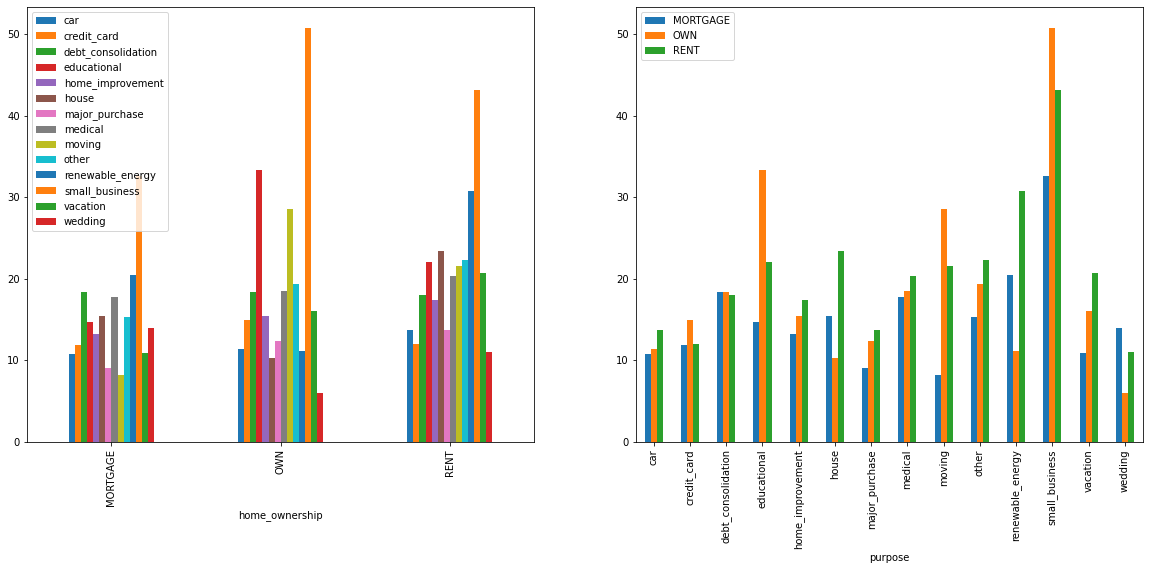

In [66]:
fig, (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2)

t3.T.plot(ax =ax1, kind='bar', figsize = (20,8)).legend(loc='best')

t3.plot(ax=ax2, kind='bar', figsize = (20,8)).legend(loc='best')
plt.show()

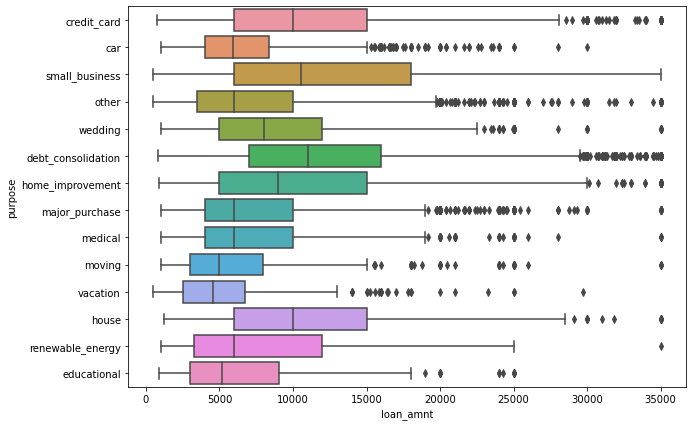

In [67]:
plt.figure(figsize=(10,7))
sns.boxplot(y='purpose', x='loan_amnt', data =loan_data)# ,palette='rainbow')
plt.show()

___

## Factors for Conclusion
___

### Check correlation of features noted as important  

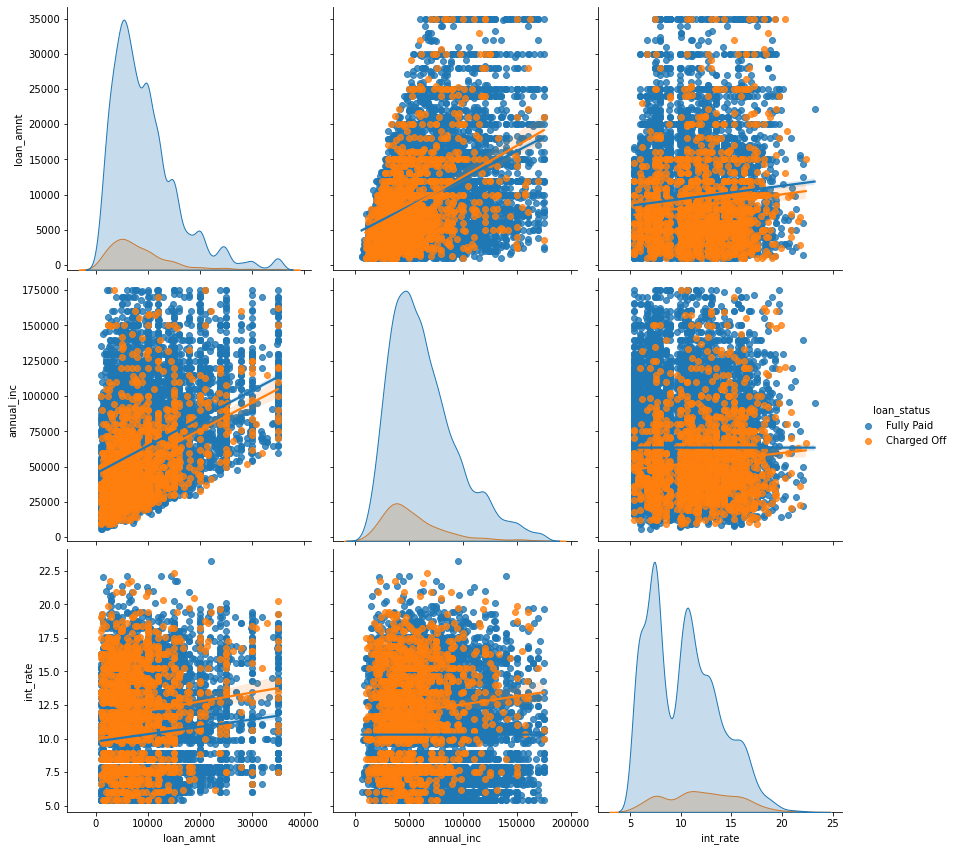

In [68]:
sns.pairplot(loan_data[(loan_data['issue_year'] == '2011') & (loan_data['term']==' 36 months') & (loan_data.pub_rec_bankruptcies == 0)], 
             kind= 'reg',
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             #plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

### Insights:
1. __Not only are the loan features under imphasis, less correlated__ (hence all important), __but also, do these features very clearly support our observations from univariate analysis__.

___

# 6. Conclusions and Recommendations
___

###   To avoid loss of business:
*  Lend out loans to candidates who can be categorized into __Grade 'A'__ and it's subgrades
*  Lend out loans to applicants who ->
    *  have __High annual income__ (typically over 50K)
    *  __need lesser loan__ (typically below 15K)
    *  have __no previous history__ of loan defaults OR __public bankruptcies__
    *  are from eastern or central states 
*  Lend these loans at: 
    *  lower intrest rates
    *  for shorter period (36 months)

### To avoid financial loss
*  Avoid lending out loans to candidates who can be categorized into __Grades 'B', 'F' or 'G'__ and it's subgrades
*  Avoid lend out loans to applicants who ->
    *  have __low annual income__ (typically less than 50K)
    *  need __more loan__ (typically over 15K)
    *  have __previous history__ of loan defaults OR __public bankruptcies__
    *  are from western states
    *  need loans for longer period  
*  __Perform a better verification__: most of the defaulters fall under 'verified' or 'Source Verified' category
*  __Follow strict guidlines__ while lending the loans __during the first financial quarter__

___

## Proof of Conclusions:

#### To avoid loss of business
#### Sample below shows best case scenario for granting the loan

In [69]:
Avoid_Loss_of_Business = pd.DataFrame (loan_data.loc[(loan_data['annual_inc']>=50000) &
                                      (loan_data['loan_amnt']<=15000) &
                                      (loan_data['int_rate']<=10) &
                                      (loan_data['term']==' 36 months') & 
                                      (loan_data.pub_rec_bankruptcies == 0), 
                                ['loan_status']].value_counts(normalize=True)*100).rename(columns={0:'% Share'})
Avoid_Loss_of_Business.round(2)

% Share
loan_status         
Fully Paid     95.13
Charged Off     4.87

___
#### To avoid financial loss
#### Sample below shows worst case scenario for granting the loan

In [70]:
Avoid_Financial_Loss = pd.DataFrame (loan_data.loc[(loan_data['annual_inc']<=50000) & 
                                    (loan_data['loan_amnt']>=15000) &
                                    (loan_data['int_rate']>=10) & 
                                    (loan_data['term']==' 60 months') &
                                    (loan_data.pub_rec_bankruptcies == 0), 
                              ['loan_status']].value_counts(normalize=True)*100).rename(columns={0:'% Share'})
Avoid_Financial_Loss.round(2)

% Share
loan_status         
Fully Paid     66.75
Charged Off    33.25

___
___